### Pourbaix Diagrams
This code is used to used to create Pourbaix Diagrams with Matplotlib. Most of the calculations will be done by hand, though the code allows for some calculations to be done by the code. That said, this is mostly a plotting script. 

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Aluminum System

In [38]:
#Solvent boundary lines
pH = np.linspace(0,12,100)
BoundaryHH2 = -0.059*pH
BoundaryO2H2O = 1.29-0.059*pH

phAl2O3Al = np.linspace(4,8,100)
BoundaryAl2O3Al = -1.516-(0.059*phAl2O3Al)**6
BoundaryAl2O3Al



array([-1.51617277, -1.51618351, -1.5161948 , -1.51620666, -1.51621912,
       -1.5162322 , -1.51624592, -1.51626031, -1.5162754 , -1.51629121,
       -1.51630777, -1.5163251 , -1.51634324, -1.51636222, -1.51638206,
       -1.5164028 , -1.51642447, -1.5164471 , -1.51647073, -1.5164954 ,
       -1.51652113, -1.51654796, -1.51657593, -1.51660509, -1.51663546,
       -1.5166671 , -1.51670004, -1.51673432, -1.51676999, -1.51680709,
       -1.51684567, -1.51688577, -1.51692745, -1.51697074, -1.51701571,
       -1.5170624 , -1.51711087, -1.51716117, -1.51721334, -1.51726746,
       -1.51732358, -1.51738175, -1.51744203, -1.5175045 , -1.5175692 ,
       -1.5176362 , -1.51770557, -1.51777737, -1.51785168, -1.51792855,
       -1.51800807, -1.5180903 , -1.51817532, -1.5182632 , -1.51835402,
       -1.51844785, -1.51854478, -1.5186449 , -1.51874827, -1.51885498,
       -1.51896513, -1.51907879, -1.51919607, -1.51931704, -1.51944181,
       -1.51957046, -1.51970309, -1.51983981, -1.5199807 , -1.52

Text(0, 0.5, 'E(V)')

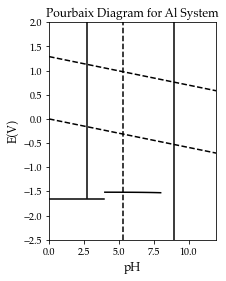

In [39]:
fig = plt.figure(figsize = (3,4))

#Axis limits
plt.xlim(-0,12)
plt.ylim(-2.5,2)

#All of the relevant boundary lines. Everything in this cell up to this point can be copied.
plt.plot(pH,BoundaryHH2, '--', color = 'black')
plt.plot(pH,BoundaryO2H2O, '--', color = 'black')
plt.plot(phAl2O3Al,BoundaryAl2O3Al, color = 'black')
plt.axhline(-1.66,xmax= .33, color = 'black')
plt.axvline(2.75, ymin= .19, color = 'black')
plt.axvline(8.93, color = 'black')
plt.axvline(5.27, color = 'black', linestyle =  '--')

#Font selection
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"

#Plot Labeling
plt.title('Pourbaix Diagram for Al System')
plt.xlabel('pH', fontsize = '12')
plt.ylabel('E(V)', fontsize = '12')